In [131]:
import os
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from statsmodels.graphics.tsaplots import plot_acf

In [19]:
os.chdir('Documents/repos/regression')
os.listdir()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Documents/repos/regression'

In [20]:
# set time interval (displayed for example, full time interval requested with these parameters)
start = datetime.datetime(1800, 1, 1)
end = datetime.date.today()
 
# Quandl API key from your personal account
api_key = '7__Wy8c2tpqaSnHRyQfp'
    
s = "AAPL"
apple = quandl.get("WIKI/" + s, api_key=api_key)
apple.index = pd.to_datetime(apple.index, format = '%Y-%m-%d')
print("{0} stock data from {1} to {2} downloaded form Quandl."
      .format(s, start, end))

AAPL stock data from 1800-01-01 00:00:00 to 2019-05-28 downloaded form Quandl.


Text(0.5, 0.98, 'Adj. Close of AAPL from 1800-01-01 00:00:00 to 2019-05-28')

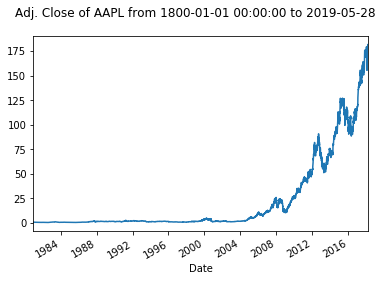

In [24]:
column = 'Adj. Close'
apple[column].plot()
plt.suptitle("{0} of {1} from {2} to {3}"
             .format(column, s, start, end))

### Time series data

A time series is a sequence of vectors (or scalars) which depend on time $t$.

$ \{~x(t_0), x(t_1),~\dots,~x(t_{i-1}), x(t_i), x(t_{i+1}),~\dots~\} $

which is an output from some process $P$ in which we are interested.

$ \boxed { P } \longrightarrow x(t) $

A time-series is a **collection of observations or measurements taken over a period of time**, generally in equal intervals. Time-series only contain numeric data types and are **indexed by time**. In other words, time-series data is always sortable by time.

Phenomena described by time series can be 


* **discrete** (stock closing value each day, number of sales per day) 


* **continuous** (continuous signal)

    * $t$ is real-valued, and $x(t)$ is a continuous signal
    
    * **continuous** phenomena can be turned into **discrete** via **sampling or resampling**
    
    * in uniform sampling, if the sampling period is chosen as $\delta t$, then
    
    $ \{ x(t) \} = \{ ~ x(0), x(\Delta t), x(2 \Delta t), x(3 \Delta t), ~ \dots ~ \} $
    
In addition to describing either discrete or continuous phenomena, time series can also be **deterministic** vs **stochastic**, governed by **linear** vs **nonlinear** dynamics, _etc._

### Possible types of processing time series

Possible types of processing tasks for time series include:
* **predict** future values of $x[t]$
* **classify** a series into one of a few classes:
    * "price will go up"
    * "price will go down -- sell now"
    * "no change"
* **describe** a series using a few parameter values of some model
* **transform** one time series into another
    * oil prices $\mapsto$ interest rates

### Resampling

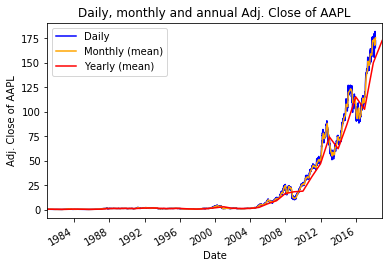

In [28]:
apple_monthly_mean = apple.resample("M").mean()
apple_annual_mean = apple.resample("Y").mean()

f, ax = plt.subplots(1)
apple[column].plot(ax=ax, color='blue', label='Daily')
apple_monthly_mean[column].plot(ax=ax, color='orange', label='Monthly (mean)')
apple_annual_mean[column].plot(ax=ax, color='red', label='Yearly (mean)')
ax.set_title("Daily, monthly and annual {0} of {1}"
             .format(column, s))
ax.set_ylabel("{0} of {1}".format(column, s))
ax.legend(loc='upper left')
plt.show()

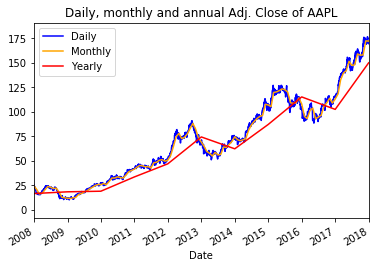

In [29]:
f, ax = plt.subplots(1)
apple[column].plot(ax=ax, color='blue', label='Daily')
apple_monthly_mean[column].plot(ax=ax, color='orange', label='Monthly')
apple_annual_mean[column].plot(ax=ax, color='red', label='Yearly')
ax.set_title("Daily, monthly and annual {0} of {1}"
             .format(column, s))
ax.set_xlim('2008', '2018')
ax.legend(loc='upper left')
plt.show()

### Input feature - Adj. Close

Text(0.5, 0.98, 'Input X: daily Adj. Close of AAPL')

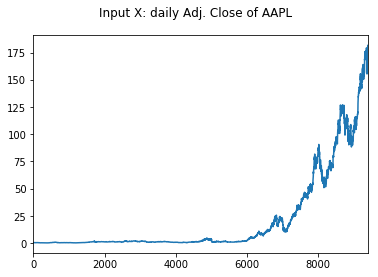

In [86]:
X = apple[[column]]
X_se = apple[column].reset_index(drop=True)
X_m_se = apple_monthly_mean[column].reset_index(drop=True)
X_y_se = apple_annual_mean[column].reset_index(drop=True)
X_se.plot()
plt.suptitle("Input X: daily {0} of {1}"
             .format(column, s))

Text(0.5, 0.98, 'Input X_m: monthly mean Adj. Close of AAPL')

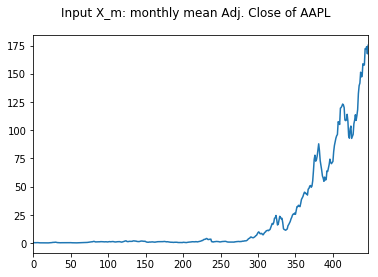

In [87]:
X_m_se.plot()
plt.suptitle("Input X_m: monthly mean {0} of {1}"
             .format(column, s))

Text(0.5, 0.98, 'Input X_y: yearly mean Adj. Close of AAPL')

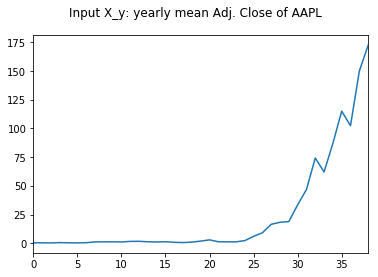

In [88]:
X_y_se.plot()
plt.suptitle("Input X_y: yearly mean {0} of {1}"
             .format(column, s))

## Embedding of time series

Temporal data presents a challenge to deal with because time is constantly moving forward, next obervation often depends on the values of observations prior to it. However, this also offers us a way to _transform_ a **one-dimensional time vector** into **infinite-dinemsional spatial vector**.

We can accomplish such transformation by setting up a shift register of delays, so we can retain successive values of out time series. Then we can treat each past value as an additional spatial dimension in the input space to our predictor.

This **implicit transformation** of a **one-dimensional time vector** into an **infinite-dimensional spatial vector** is called **_embedding_**.

The input space to our **predictor must be finite**. At each instant $t$, we **truncate the history** to **only the previous $d$ samples**, where $\large{d}$ is called the **embedding dimension**.

<img src='img/pic_1.png' width='500'>



In [ ]:
X_emb = pd.concat([X,
                   X[column].shift(1),
                   X[column].shift(2),
                   X[column].shift(3),
                   X[column].shift(4),
                   X[column].shift(5),
                   X[column].shift(6),
                   X[column].shift(7),
                   X[column].shift(8),
                   X[column].shift(9),
                   X[column].shift(10),
                   X[column].shift(11),
                   X[column].shift(12),
                   X[column].shift(13),
                   X[column].shift(14),
                   X[column].shift(15),
                   X[column].shift(16),
                   X[column].shift(17),
                   X[column].shift(18),
                   X[column].shift(19),
                   X[column].shift(-1),
                   X[column].shift(-5),
                   X[column].shift(-10),
                   X[column].shift(-20),
                   X[column].shift(-80),
                   X[column].shift(-240)], axis=1)
columns = [column, "t-1", "t-2", "t-3", "t-4", "t-5", 
           "t-6", "t-7", "t-8", "t-9", "t-10", "t-11",
           "t-12", "t-13", "t-14", "t-15", "t-16", 
           "t-17", "t-18", "t-19", "t+1", "t+5", "t+10",
           "t+20", "t+80", "t+240"]
X_emb.columns = columns
X_emb.head()

## Autocorrelation

From [machinelearningmastery.com](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/):

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

This relationship between variables is called _correlation_.

If both variables change in the same direction (e.g. go up together or down together), this is called a _positive correlation_. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called _negative correlation_.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an _autocorrelation_. It is also called _serial correlation_ because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not.

Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

### Quick check for autocorrelation
We can plot the observation at the previous time step (t-1) with the observation at the next time step (t+1) as a scatter plot.

In [ ]:
pd.plotting.lag_plot(X_se)
plt.suptitle("Daily {0} of {1}: lag plot"
             .format(column, s))

In [ ]:
pd.plotting.lag_plot(X_m_se)
plt.suptitle("Monthly mean {0} of {1}: lag plot"
             .format(column, s))

In [ ]:
pd.plotting.lag_plot(X_y_se)
plt.suptitle("Yearly mean {0} of {1}: lag plot"
             .format(column, s))

In [ ]:
lags = [1, 5, 20, 80, 240]
for lag in lags:
    pd.plotting.lag_plot(X_se, lag=lag, alpha=0.1)
    plt.suptitle("Daily {0} of {1}: lag plot, lag={2}"
                 .format(column, s, lag))
    plt.show()

### Pearson correlation coefficient
Another quick check that we can do is to directly calculate the correlation between the observation and the lag variable.

We can use a statistical test like the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). This produces a number to summarize how correlated two variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation and high values above 0.5 or below -0.5 showing high correlation.

In [ ]:
lag = 240
X_emb.corr().loc['t+' + str(lag)][:20].plot()
plt.suptitle("Correlation between lagged variables and target "
             "[t+{0}]".format(lag))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 10, as_cmap=True)
# Draw the heat map with the mask and correct aspect ratio
sns.heatmap(X_emb.corr(),
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True,
            ax=ax)
plt.show()

We can plot the correlation coefficient for each lag variable. This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

In [ ]:
pd.plotting.autocorrelation_plot(X_se)
plt.suptitle("Autocorrelation for daily data")

In [ ]:
pd.plotting.autocorrelation_plot(X_m_se)
plt.suptitle("Autocorrelation for resampled monthly mean data")

In [ ]:
pd.plotting.autocorrelation_plot(X_y_se)
plt.suptitle("Autocorrelation for resampled annual mean data")

Daily data has the strongest autocorrelation, resampled yearly data has the weakest.

In [ ]:
f, ax = plt.subplots(1)
pd.plotting.autocorrelation_plot(X_se, ax=ax)
ax.set_title("Autocorrelation for daily data")
ax.axvline(200, linestyle='--', color='gray')
ax.text(300, 0.85, "200 time steps")
plt.show()

In [ ]:
plot_acf(X_se, lags=500)
plt.suptitle("First 500 lags of {0}".format(column))
plt.axhline(0.8, linestyle='--', color='gray')
plt.axvline(200, linestyle='--', color='gray')
plt.show()

First 200 time steps have correlation values above 0.8.

## Time series forecasting models

### Predicting the future

Extending backward from time $t$, we have time series $ \{ ~ x[t], ~ x[t− 1], ~ \dots ~ \} $ . 

From this, we now want to estimate $x$ at some future time

$ \hat{x}[t + s] ~ = ~ f( x[t], ~ x[t-1] ~, ~ \dots ~ ) $

where $\large{s}$ is called the **horizon of prediction**.

If we choose horizon of prediction $s$ to be 1 sample into the future, $\implies s=1$

This is a **function approximation problem**. To solve it, we will adhere to the following **methodology**:


1. **Split** the available historical time series **data into _training_ and _test_ subsets**. 
    * this **can be accomplished by selecting a point in time**
    
    * all the data **prior to the split** point will be used for **_training_** of the model
    
    * all the data **following the split** point will be used to _**test**_ it


2. **Assume a generative model**


3. For every point $x[t_i]$ in the training set, **train the generative model** 
    * a _sliding_ or _expanding gate_ moves through all the data in the **_training_** subset via a loop
    * **each position** of the gate (iteration of the loop) represents a **moment in the past $t_i$** captured in the training subset  
    * values of the time series that **preceded $t_i$** are used as the **vector of inputs $X$**, 
        * **shape and length of $X$ is determined by the type of the gate** (_expanding_ or _sliding_) **and its length** 
    * **next sample after $t_i$** (in the case of horizon of prediction $s=1$) is **used as the target variable $y$**
    * model is **trained by continuously moving the gate over all of the training data**


4. **Test model performance** by using it to **make predictions over the test set** (the part of the available historical time series data that **has not been used in the training** of the model)
    * using the same mechanic as was used for training, the _gate_ moves through the **_test_** subset and 
    * **vectors of inputs $X$ are fed** into the trained model to **make predictions about the next value of $y$** (next value of time series after the _gate_)
    * model predictions are **compared to the real values** of the time series in the **_test_** subset, prediction **error is calculated**

### Three classes of linear process models encountered in Digital Signal Processing (DSP) theory 

Time series are the **focus of several overlapping disciplines**:

* **Information Theory** deals with describing stochastic time series.

* **Dynamical Systems Theory** deals with describing and manipulating mostly non-linear deterministic time series.

* **Digital Signal Processing (DSP)** deals with describing and manipulating mostly linear time series, both deterministic and stochastic.

**Digital Signal Processing (DSP)** proposes three main classes of linear process models:

* **Autoregressive** ($AR[p]$) models

$AR[p]$ at its heart is an _Infinite Impulse Response (IIR) filter_ (input $u[t]$ contributes to $x[t]$ at time $t$, but otherwise $x[t]$ _is a weighted sum of its own past samples_ given a coefficient vector $\alpha_i$) applied to some (unknown) internal signal, $\epsilon[t]$. $p$ is the order of that filter. 

$$ \large{ x[t] = \sum_{i=1}^p a_i x[t-i] ~ + ~ \epsilon[t] } $$

if on average $\epsilon[t]$ is small compared to $x[t]$, then we can estimate $\hat{x}[t]$ using

$$ \large{ \hat{x} ~ \equiv ~ x[t] ~ - ~ \epsilon [t] = \sum_{i=1}^p w_i x [t-i] } $$ 

The $w_i$'s are estimates of $\alpha_i$'s.

A diagram of an _Infinite Impulse Response (IRR) filter_:

<img src='img/pic_3.png' width='300'>

* **Moving Average** ($MA[q]$) models

$MA[q]$ at its heart is a _Finite Impulse Response (FIR) filter_ (convolution of the input signal $u[t]$ with a given coefficient vector $ \{ \beta_i \})$ applied to some (unknown) internal signal, $\epsilon[t]$. $q + 1$ is the order of that filter.

$$ \large{ x[t] ~ = ~ \sum_{i=0}^q \beta_i \epsilon [t-i] } $$

In this case, we cannot assume that $\epsilon [t]$ is negligible; $x[t]$ would have to be negligible. This method is seldom used alone in practice, as by using the equation above, we are not making explicit use of the past values of $x[t]$.

A diagram of an _Finite Impulse Response (FIR) Filter_:

<img src='img/pic_4.png' width='300'>

* **Autoregressive Moving Average** ($ARMA[p, q]$) models

A combination of the $AR[p]$ and $MA[q]$ models:

$$ \large{ x[t] ~ = ~ \sum_{i=1}^p \alpha_i x [t-i] ~ + ~ \sum_{i=1}^q \beta_i \epsilon [t-i] + \epsilon[t] } $$

To estimate values of $x[t]$, we assume that $\epsilon[t]$ at time $t$ is small relative to $x[t]$. We can obtain estimates of past values of $\epsilon[t]$ at time $t-i$ from past true values of $x[t]$ and past values of $\hat{x}[t]$:

$$ \large{ \hat{\epsilon}[t-i] ~ = ~ x[t-i] ~ - ~ \hat{x}[t-i] } $$

The estimate for $x[t]$ is then 

$$ \large{ \hat{x}[t] = \sum_{i=1}^p \alpha_i x [t-i] ~ + ~ \sum_{i=1}^q \beta_i \hat{\epsilon} [t-i] } $$

In [38]:
# length of the sliding window
window_length = 20


Description and Python implementation of time series models taken from [machinelearningmastery.com](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/).

### Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps. The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model. The method is suitable for univariate time series without trend and seasonal components.

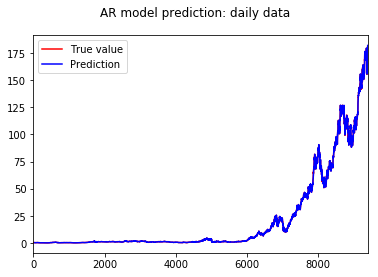

In [95]:
# AR example
from statsmodels.tsa.ar_model import AR
# fit model (daily data)
model = AR(X_se)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(40, len(X_se))
X_se.plot(color='red', label="True value")
yhat.plot(color='blue', label="Prediction")
plt.suptitle("AR model prediction: daily data")
plt.legend(loc='upper left')

Text(0.5, 0.98, 'AR model prediction: monthly data')

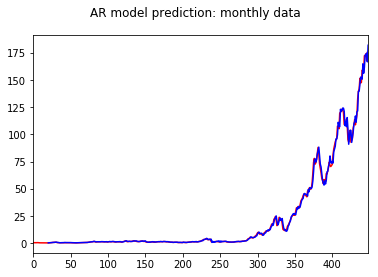

In [98]:
# fit model(monthly data)
model = AR(X_m_se)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(20, len(X_m_se))
X_m_se.plot(color='red', label="True value")
yhat.plot(color='blue', label="Prediction")
plt.suptitle("AR model prediction: monthly data")

Text(0.5, 0.98, 'AR model prediction: monthly data')

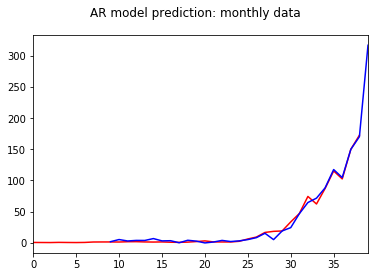

In [104]:
# fit model(monthly data)
model = AR(X_y_se)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(9, len(X_y_se))
X_y_se.plot(color='red', label="True value")
yhat.plot(color='blue', label="Prediction")
plt.suptitle("AR model prediction: monthly data")
